# CHEM 10 - Lab 0: Introduction to using Python notebooks in JupyterHub

This python notebook will introduce some of the commands and tools that you can use for upcoming labs. You can use code to do math and to make best fit lines (linear regression).  This python notebook will help to walk you through how to make a plot. There are lots of small steps so that you can try to understand each piece of code. 

We will be reading in data from a file and then making a best fit line. For your lab reports, you would need to use your own data that you collect during lab. 

First, load some of the python libraries.  This will help us with some calculations and making plots. 

In [2]:
import numpy
import scipy
import matplotlib.pyplot as plt
from scipy import stats

When we are making plots, most of the time we will be storing multiple data points in an array.  So first we will set up some empty arrays that we will populate with data (normally this would be the data you collected during lab).  It is good practice to name your arrays according to the data that you have. 

In [3]:
# Set up empty arrays for the data
time = []
temperature = []

Next, you will read in the data from a text file. You will need to specify the name of the file, as well as how you have separated/delimited your values (e.g. are the values separated by spaces or commas?). You can skip initial lines of text that will be headers for your data. Here we will read in data from a file called 'lab_0_data.txt'. The code is set up to read in data delimited (separated) by spaces (this is the default, so we use delimiter=none), but depending on how you enter your data, you can change this, e.g. to be comma delimited. The code below is set up to skip the first one line of text in the file (the header).  If you are curious about this function call, you can search for numpy.genfromtxt to find out more information about how it works. 

In [4]:
# Read in the data from the lab_0_data.txt file, but skip the header on the first line 
# The output of this function is a list of lists; that is, each row is a entry in our list, but each row is itself a list of values. 
file = ('lab_0_data.txt')  
values = numpy.genfromtxt(fname=file, skip_header=1, delimiter=None, dtype='unicode')
print(values)

[['0' '0']
 ['25' '12']
 ['50' '22']]


Check that these values match what is in your data.txt file. Next, we will load these values from the text file into the arrays using a for loop in which we append each value (add to the end of the array). Sometimes it is useful to print things out along the way to understand what your code is doing. Feel free to remove the # in the print statements below to try and understand each step. Keep in mind that you are adding values to an array, so if you re-run the code in this cell, you will just keep adding values. To start from scratch, re-run the empty array code above first, then each code cell after.  Here we are recasting our values from strings into floats. 

In [5]:
for i in range(0, len(values)):
    #print(i)
    #print(values[i,0])
    time.append(float(values[i,0])); 
    temperature.append(float(values[i,1]));
print (time)
print (temperature)

[0.0, 25.0, 50.0]
[0.0, 12.0, 22.0]


You should now have two separate arrays. It is a good idea to always check that you have the correct number of values in your arrays and that the values match your data. If we want to make a plot of our data, these arrays can be the x and y data points.  Let's plot the data. You should always label the axes on your plots. You can change the shape and color of the symbol plotted, and you can change the x and y limits of the axes.  You can find more information by looking up matplotlib.pyplot.plot

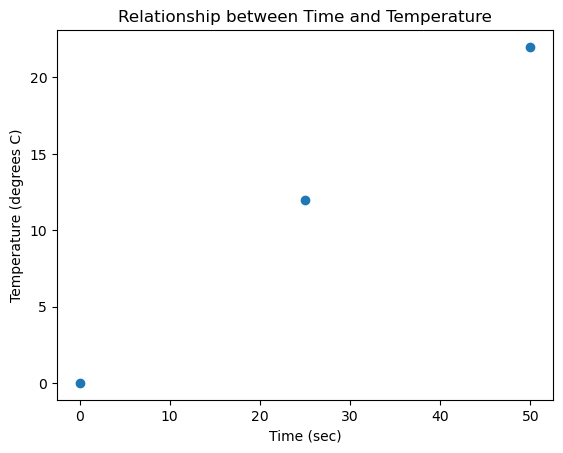

In [6]:
# Plot your data
# You can change the text to represent the proper x and y axes labels, and change the title
plt.figure()
plt.xlabel('Time (sec)')
plt.ylabel('Temperature (degrees C)')
plt.title("Relationship between Time and Temperature")
plt.plot(time, temperature, 'o', label='measured data')
plt.legend()
#plt.ylim(-10, 180)
#plt.xlim(-300, 110)

Look at your plot - does it make sense based on your values? Do you need to make any adjustments? If we have the x and y values, we can also use the stats package to compute the best fit line for this data. This is done with linear regression in the stats package / library, and will generate a slope, intercept, and rvalue from a linear regression fit. If you are curious, you can search for stats.linregress to find out more about how it works. 

In [7]:
print("\nDetermining best fit line... \n")
# Use linear regression to determine the best fit line
fit = stats.linregress(time, temperature)
print(f"R-squared: {fit.rvalue**2:.6f}")
print(f"Slope: {fit.slope:.6e}")
print(f"intercept: {fit.intercept:.6e}")


Determining best fit line... 

R-squared: 0.997253
Slope: 4.400000e-01
intercept: 3.333333e-01


Think about your values - does the slope make sense based on your data? Let's save these values as text so that we can add them to our plot later. We will save each value in float format with four decimal places.

In [9]:
R_text = f"R^2 = {fit.rvalue:.4f}"
eqn_text = f"y = {fit.slope:.4f} x + {fit.intercept:.4f}" # y = mx + b
print(R_text)
print(eqn_text)

R^2 = 0.9986
y = 0.4400 x + 0.3333


Now we determine the fit values from our equation of the best fit line so that we can add them to the graph. 

In [11]:
# Use slope from the fit to determine the fitted values for the plot
# We use y = mx + b to determine the y value for the best fit line
fit_temperature = []  # create empty array
for value in time:
    temp = fit.slope * value + fit.intercept
    fit_temperature.append(temp)

print(fit_temperature)

[0.3333333333333339, 11.333333333333334, 22.333333333333336]


Did you generate the right number of values for your array? If so, we will add this new array of best fit data to the plot, and add text for the equation for the best fit line.

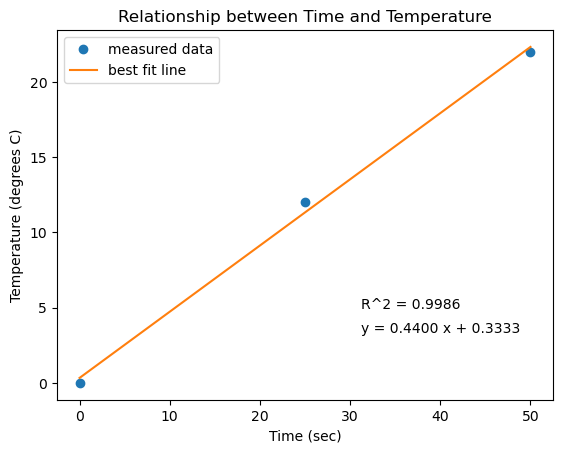

In [17]:
plt.figure()
plt.xlabel('Time (sec)')
plt.ylabel('Temperature (degrees C)')
plt.title("Relationship between Time and Temperature")
plt.plot(time, temperature, 'o', label='measured data')
#plt.ylim(-10, 180)  # set up the limits for the x and y axes
#plt.xlim(-300, 110)
plt.plot(time,fit_temperature, '-', label='best fit line') 
plt.legend()
#adding text inside the plot
plt.figtext(0.6, 0.25, eqn_text)  # Place the equation text where you want it
plt.figtext(0.6, 0.3, R_text)
#plt.show()
plt.savefig('Test_data_plot.png')

Woo! Hopefully this looks like a nice  straight line along with the data points from your file. The plot will be saved as a png file for you to print out for your lab.